In [4]:
from pybacktestchain_ss.data_module import FirstTwoMoments
from pybacktestchain_ss.broker import Backtest, StopLoss, ProfitTaking
from pybacktestchain_ss.portfolio_strategies import RiskAverseStrategy, \
    MaximumReturnStrategy, MinimumVarianceStrategy, MaximumSharpeStrategy, EqualRiskStrategy, EqualWeightStrategy
from datetime import datetime, timedelta

# Set verbosity for logging
verbose = False  # Set to True to enable logging, or False to suppress it

INFO:root:Running backtest from 2019-01-01 00:00:00 to 2020-01-01 00:00:00.


INFO:root:Retrieving price data for universe
INFO:root:-----------------------------------
INFO:root:Rebalancing portfolio at 2019-01-01 00:00:00
C:\Users\samul\pybacktestchain_ss\src\pybacktestchain_ss\broker.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.transaction_log = pd.concat([self.transaction_log, transaction], ignore_index=True)
INFO:root:Stop loss triggered for TSLA at 2019-01-23 00:00:00. Selling all shares.
INFO:root:-----------------------------------
INFO:root:Rebalancing portfolio at 2019-01-31 00:00:00
INFO:root:-----------------------------------
INFO:root:Rebalancing portfolio at 2019-02-28 00:00:00
INFO:root:Stop loss triggered for TSLA at 2019-03-06 00:00:00. Selling all shares.
INFO:root:-------------------

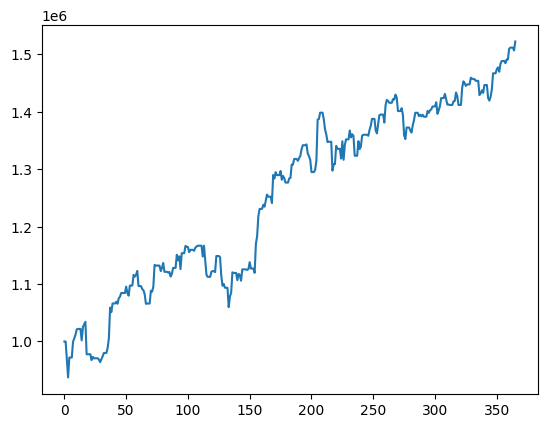

In [5]:
backtest = Backtest(
    initial_date=datetime(2019, 1, 1),
    final_date=datetime(2020, 1, 1),
    universe = ['AAPL', 'MSFT', "WMT", "TSLA", "SNAP"],
    initial_cash = 1000000,
    information_class=FirstTwoMoments,
    risk_model=StopLoss,
    risk_threshold=0.1,
    name_blockchain="backtest",
    portfolio_strategy=EqualRiskStrategy,
    s=timedelta(days=360),
    verbose=verbose
)

df = backtest.run_backtest()
df["Portfolio value"].plot();